# Density segmentation

A single tissue slice may contain regions of high and low UMI density. These can be due to a multitude of factors, some of which include biological differences in RNA content (such as by cell type), different cell densities (number of cells per unit area), etc. Therefore, separating pixels by UMI density prior to cell segmentation can achieve better-calibrated cell segmentation performance by considering each UMI density region separately, so that differences in UMI density is not the primary driving factor of whether a pixel is called as a cell.

In [2]:
import gzip

import matplotlib.pyplot as plt
import numpy as np
import spateo as st

plt.rcParams['image.interpolation'] = 'none'
%config InlineBackend.figure_format='retina'

/Users/josephmin/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/Users/josephmin/miniconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11102. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/josephmin/miniconda3/lib/python3.9/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [46]:
total, exonic, intronic = st.io.read_bgi_agg('data/SS200000135TL_D1_all_bin1.txt.gz', binsize=10)

In [59]:
clusters = st.pp.segmentation.segment_densities(total, 5, distance_threshold=4)

Text(0.5, 1.0, 'UMI density clusters')

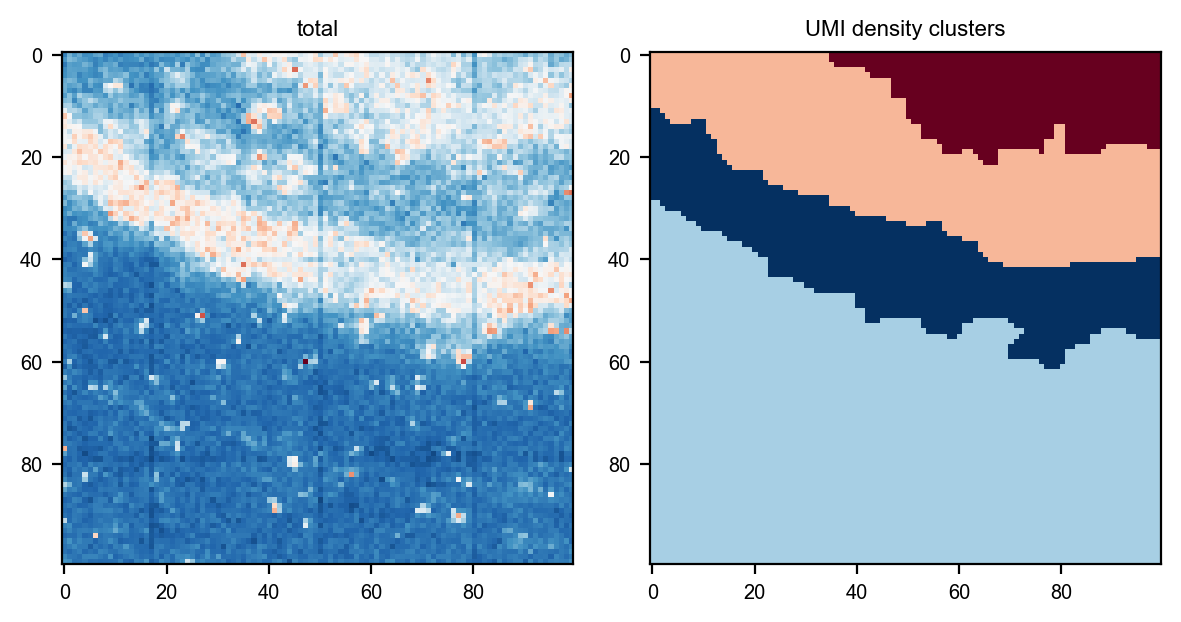

In [60]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 3), tight_layout=True)
axes[0].imshow(total.A, vmin=0)
axes[0].set_title('total')
axes[1].imshow(clusters)
axes[1].set_title('UMI density clusters')

In [61]:
with gzip.open('data/SS200000135TL_density_clusters_bin10.npz.gz', 'w') as f:
    np.save(f, clusters)

In [ ]:
# TODO: use these clusters for segmentation